In [25]:
#imports
import PIL.Image as img
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub

In [26]:
def tensorImage(tensor):
    """
    Converts Tensor to Image
    :param tensor: Tensor to be converted
    :return: Image
    """
    tensor = np.array(tensor*255, dtype=np.uint8)

    if np.ndim(tensor) > 3:
        tensor = tensor[0]
    else:
        raise Exception()

    return img.fromarray(tensor)

In [27]:
def load_image(path):
    """
    Loads image from path
    param path: path to image
    return: image
    """
    max_res = 512

    image = tf.io.read_file(path)
    image = tf.image.decode_image(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)

    shape = tf.cast(tf.shape(image)[:-1], tf.float32)
    long_side = max(shape)
    scaling_fac = max_res/long_side

    new_shape = tf.cast(shape*scaling_fac, tf.int32)

    image = tf.image.resize(image, new_shape)
    image = image[tf.newaxis, :]

    return image

In [33]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2') #setting up the model

**Example** 1

In [34]:
stylized_image = model(tf.constant(load_image('content.png')), tf.constant(load_image('reference.png')))[0] #transfering the style of the reference image to the content

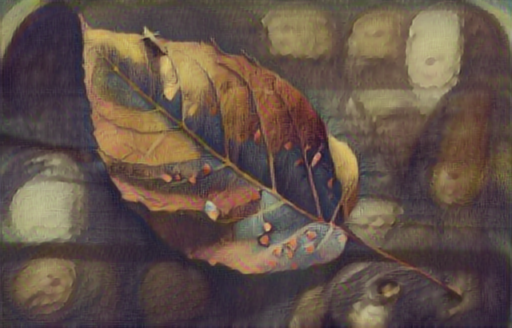

In [35]:
tensorImage(stylized_image)

**Example** 2

In [36]:
stylized_image2 = model(tf.constant(load_image('reference.png')), tf.constant(load_image('content.png')))[0]

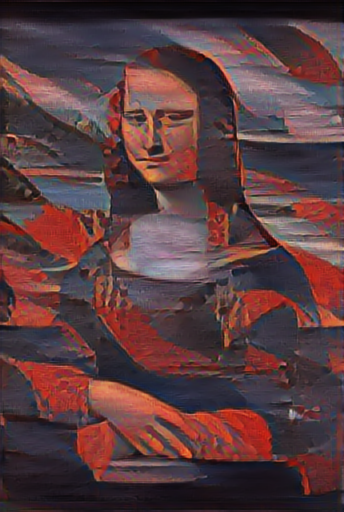

In [37]:
tensorImage(stylized_image2)